# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-30 03:44:36--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-30 03:44:36--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [40]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [4]:
tweets.Label.value_counts()

,count
Label,
non-biased,1596
biased,318


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [42]:
# prompt: 3. Preprocesamiento de Texto
# Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

def preprocess_text(text):
    # Limpieza de caracteres especiales
    text = re.sub(r'[^\w\s]', '', text)

    # Conversión a minúsculas
    text = text.lower()

    # Eliminación de stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the preprocess_text function to the 'Contents' column instead of 'Tweet'
tweets['processed_text'] = tweets['Contents'].apply(preprocess_text)
tweets.head()


,Contents,Label,processed_text
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrón tí reciben noticias colcho...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,jenniferduquee hahaha si rico nadamas falta pr...
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves programa favorito sólo encuentro...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos playa http...


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

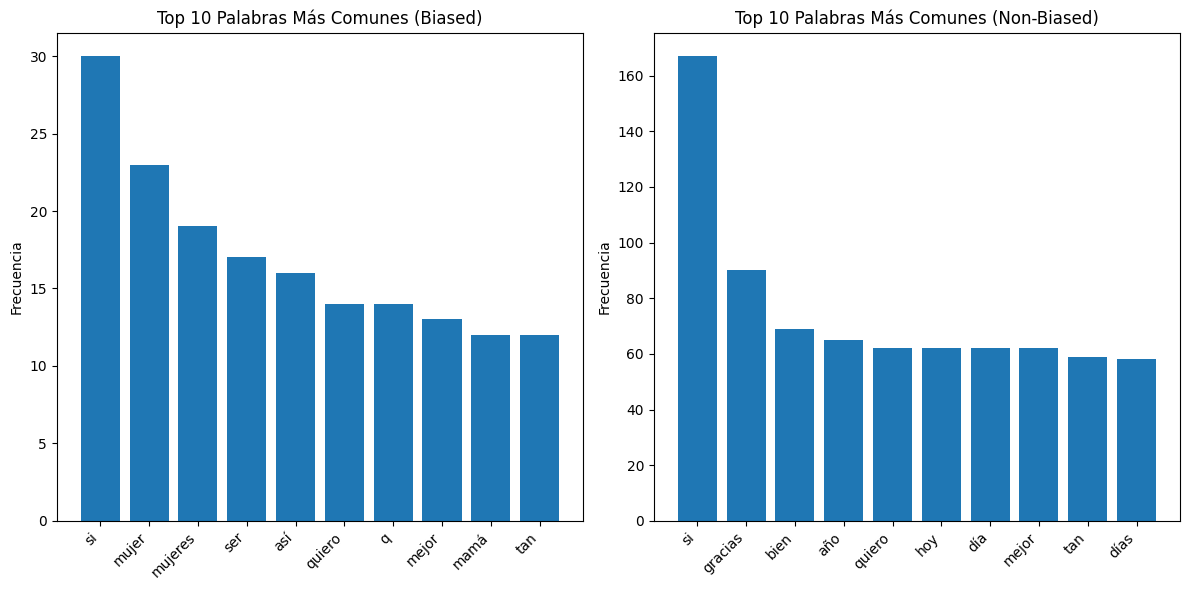

In [43]:

biased_tweets = ' '.join(tweets[tweets['Label'] == 'biased']['processed_text'])
non_biased_tweets = ' '.join(tweets[tweets['Label'] == 'non-biased']['processed_text'])

# Count word frequencies
biased_word_counts = Counter(biased_tweets.split())
non_biased_word_counts = Counter(non_biased_tweets.split())

# Get the 10 most common words for each label
top_biased_words = biased_word_counts.most_common(10)
top_non_biased_words = non_biased_word_counts.most_common(10)

# Prepare data for plotting
biased_words, biased_counts = zip(*top_biased_words)
non_biased_words, non_biased_counts = zip(*top_non_biased_words)


# Plotting Histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(biased_words, biased_counts)
plt.title('Top 10 Palabras Más Comunes (Biased)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.bar(non_biased_words, non_biased_counts)
plt.title('Top 10 Palabras Más Comunes (Non-Biased)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [49]:

def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity


tweets['sentiment'] = tweets['processed_text'].apply(analizar_sentimiento)


sentiment_stats = tweets.groupby('Label')['sentiment'].describe()
sentiment_stats




,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
biased,318.0,0.001310,0.125048,-1.0,0.0,0.0,0.0,0.8
non-biased,1596.0,0.002328,0.105816,-1.0,0.0,0.0,0.0,0.9


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

Most common words in biased tweets: [('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]
Most common words in non-biased tweets: [('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


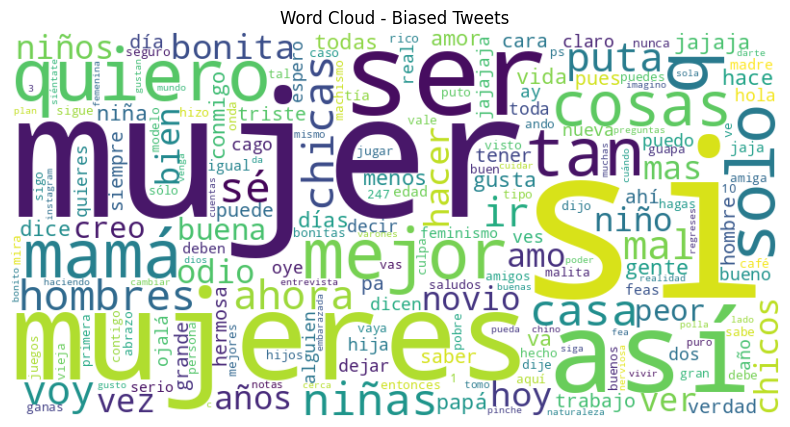

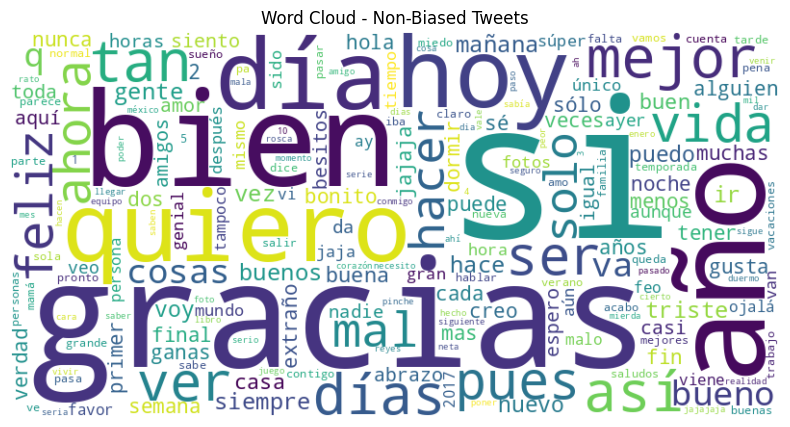

In [51]:

biased_tweets = ' '.join(tweets[tweets['Label'] == 'biased']['processed_text'])
non_biased_tweets = ' '.join(tweets[tweets['Label'] == 'non-biased']['processed_text'])

# Count word frequencies
biased_word_counts = Counter(biased_tweets.split())
non_biased_word_counts = Counter(non_biased_tweets.split())

# Get the 10 most common words for each label
most_common_biased = biased_word_counts.most_common(10)
most_common_non_biased = non_biased_word_counts.most_common(10)

# Print the most common words
print("Most common words in biased tweets:", most_common_biased)
print("Most common words in non-biased tweets:", most_common_non_biased)

# Create word clouds
wordcloud_biased = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(biased_word_counts)
wordcloud_non_biased = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(non_biased_word_counts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_biased, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Biased Tweets")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_biased, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Non-Biased Tweets")
plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?